In [85]:
import pandas as pd 
import numpy as np          # For mathematical calculations 
import matplotlib.pyplot as plt  # For plotting graphs 
from datetime import datetime    # To access datetime 
from pandas import Series        # To work on series 
%matplotlib inline 
import warnings                   # To ignore the warnings
warnings.filterwarnings("ignore")

In [86]:
train=pd.read_csv("C:/Users/sample.csv",index_col = "Date",parse_dates = True) 
test=pd.read_csv("C:/Users/test.csv",index_col = "Date",parse_dates = True)
print(train.head())
print(test.head())

            Quantity
Date                
2022-01-01      2469
2022-01-02      2082
2022-01-03      3047
2022-01-04      3121
2022-01-05      2851
            Quantity
Date                
2022-08-01      3394
2022-08-02      3033
2022-08-03      3500
2022-08-04      3338
2022-08-05      3445


In [87]:
train.columns, test.columns


(Index(['Quantity'], dtype='object'), Index(['Quantity'], dtype='object'))

In [88]:
train.dtypes, test.dtypes


(Quantity    int64
 dtype: object,
 Quantity    int64
 dtype: object)

In [89]:
train.shape, test.shape


((212, 1), (30, 1))

<AxesSubplot:xlabel='Date'>

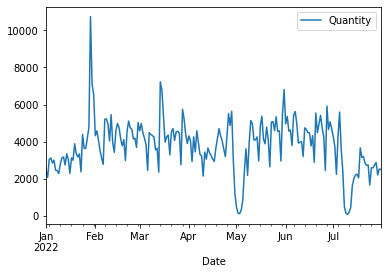

In [90]:
train.plot()

<AxesSubplot:xlabel='Date'>

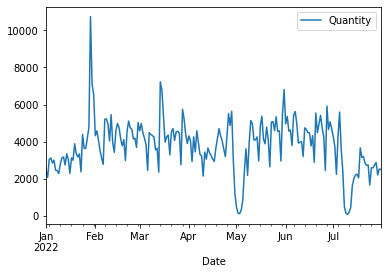

In [91]:
train.plot()

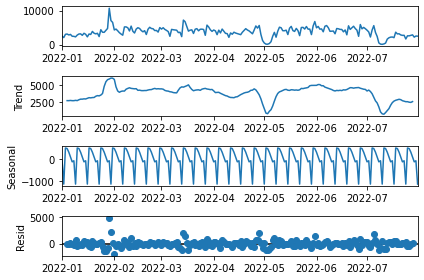

In [92]:
import statsmodels.api as sm 
sm.tsa.seasonal_decompose(train).plot() 
result = sm.tsa.stattools.adfuller(train) 
plt.show()

In [93]:
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [148]:
m = 2
alpha = 1/(2*m)
train["H"] = SimpleExpSmoothing(train["Quantity"]).fit(smoothing_level=alpha,optimized=False,use_brute=True).fittedvalues

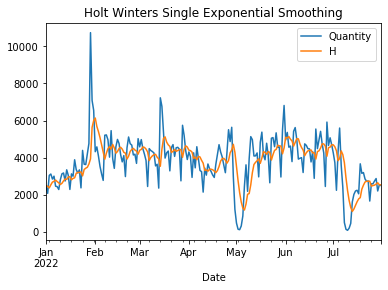

In [149]:
train[["Quantity","H"]].plot(title="Holt Winters Single Exponential Smoothing");

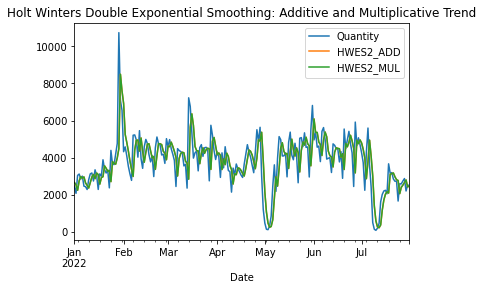

In [96]:
train["HWES2_ADD"] = ExponentialSmoothing(train["Quantity"],trend="add").fit().fittedvalues
train["HWES2_MUL"] = ExponentialSmoothing(train["Quantity"],trend="mul").fit().fittedvalues
train[["Quantity","HWES2_ADD","HWES2_MUL"]].plot(title="Holt Winters Double Exponential Smoothing: Additive and Multiplicative Trend");

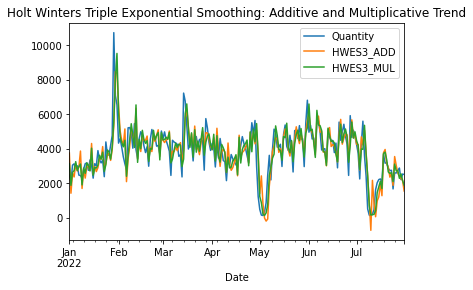

In [97]:
train["HWES3_ADD"] = ExponentialSmoothing(train["Quantity"],trend="add",seasonal="add").fit().fittedvalues
train["HWES3_MUL"] = ExponentialSmoothing(train["Quantity"],trend="mul",seasonal="mul").fit().fittedvalues
train[["Quantity","HWES3_ADD","HWES3_MUL"]].plot(title="Holt Winters Triple Exponential Smoothing: Additive and Multiplicative Trend");



Text(0.5, 1.0, 'Train, Test and Predicted Test using Holt Winters')

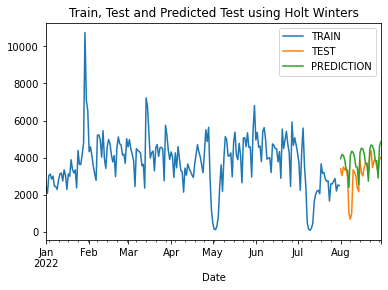

In [133]:
fitted_model = ExponentialSmoothing(train["Quantity"],trend="add",seasonal="add").fit()

test_predictions = fitted_model.forecast(30)
train["Quantity"].plot(legend=True,label="TRAIN")
test["Quantity"].plot(legend=True,label="TEST",figsize=(6,4))
test_predictions.plot(legend=True,label="PREDICTION")
plt.title("Train, Test and Predicted Test using Holt Winters")

In [137]:
from sklearn.metrics import mean_squared_error
import statistics
from math import sqrt
rms = sqrt(mean_squared_error(test, test_predictions)) 
print(rms)

1130.5959175358366


Text(0.5, 1.0, 'Train, Test and Predicted Test using Holt Winters')

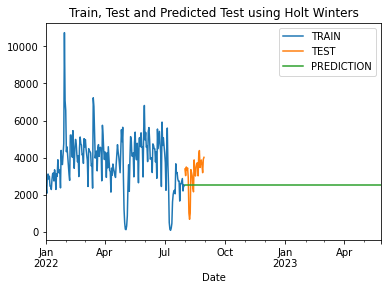

In [151]:
fitted_model = SimpleExpSmoothing(train["Quantity"]).fit(smoothing_level=alpha,optimized=False,use_brute=True)
#fitted_model = ExponentialSmoothing(train["Quantity"],trend="add",seasonal="add").fit()

test_predictions = fitted_model.forecast(300)
train["Quantity"].plot(legend=True,label="TRAIN")
test["Quantity"].plot(legend=True,label="TEST",figsize=(6,4))
test_predictions.plot(legend=True,label="PREDICTION")
plt.title("Train, Test and Predicted Test using Holt Winters")